### Objective:
To predict profits of food trucks based on the population of a city


### Import libraries and data

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotnine import *

D:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#Import the raw data
data = pd.read_csv('ex1data1.txt', header=None, names=['population', 'profit'])

### Initial Data Exploration

In [3]:
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


#### There are 97 data points

In [4]:
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


#### There is a linear trend between Population of the City and Profits
- There are 4 cities with losses
- Strong correlation

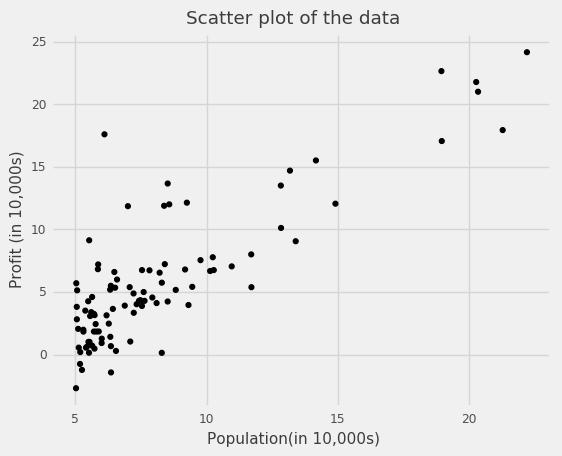

<ggplot: (153869957994)>

In [64]:
(ggplot(data=data) + aes(x='population', y='profit') + geom_point() + ggtitle('Scatter plot of the data') +
 xlab('Population(in 10,000s)') + ylab('Profit (in 10,000s)') +theme_538())

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023D359A7B70>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000023D35A27AC8>], dtype=object)

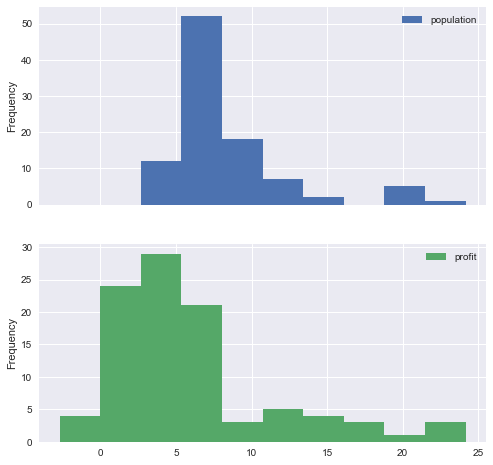

In [6]:
data.plot(kind='hist', subplots=True, figsize=[8,8])

In [7]:
data.corr()

,population,profit
population,1.000000,0.837873
profit,0.837873,1.000000


#### Linear Regression

- The model takes the form y= Q+ Q1X
- In the matrix form y=Q.T*X

### Cost Function


In [29]:
def computeCost(X,y,theta):
    var = np.power((X*theta.T)-y,2)
    return np.sum(var)/len(X)

### Data Prep for matrix operations

In [9]:
data.insert(0,'Ones',1)

In [30]:
#Total number of columns in the data frame
cols = data.shape[1]
#The predictor including the intercept term- column (0)
X = data.iloc[:,0: cols-1]
y = data.iloc[:,cols-1:cols]

In [31]:
X =np.matrix(X.values)
y =np.matrix(y.values)
theta = np.matrix(np.zeros(cols-1))

In [32]:
X.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

In [33]:
computeCost(X,y,theta)

64.145467754911351

### Gradient Descent function

In [49]:
def gradientDescent(X, y, theta, alpha, iters):  
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    # each iteration we compute theta and update the theta using the cost function
    for i in range(iters):
        error = (X * theta.T) - y
        

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)
    return theta, cost

In [50]:
alpha = 0.01
iters = 1000

g, cost = gradientDescent(X, y, theta, alpha, iters)

In [52]:
computeCost(X, y, g) 

9.0319110061578236

In [58]:
#Regression fit
x = np.linspace(data.population.min(), data.population.max(), 100)
f = g[0,0] + (g[0,1]*x)